In [1]:

#Cargar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Librerias para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
#Lectura de Datos en Python y lo cargamos en la variable Datos
Datos = pd.read_csv ("C:/Users/JULIANA DIAZ/Downloads/heart_cleveland_upload.csv")

In [21]:
#Realizamos lectura de los datos para el analisis exploratorio 
Datos.head(40)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [3]:
#Descripcion de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

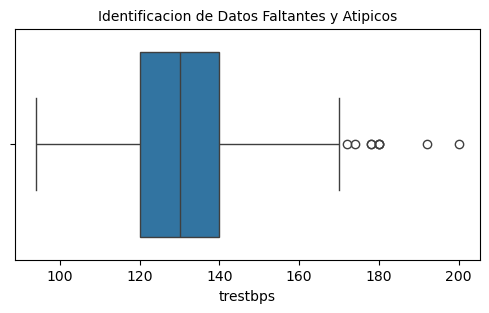

In [9]:
#Identificacion de Datos Faltantes y Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

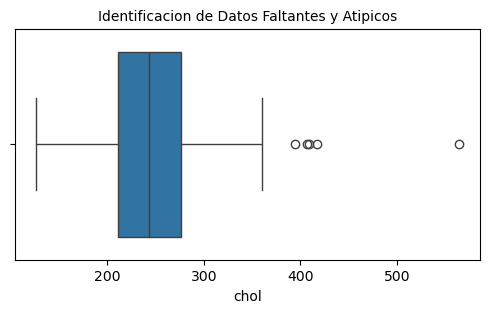

In [23]:
#Identificacion de Datos Faltantes y Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

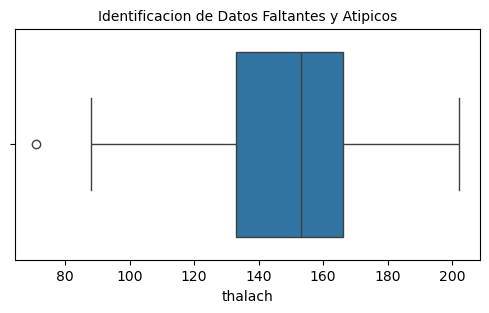

In [26]:
#Identificacion de Datos Faltantes y Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

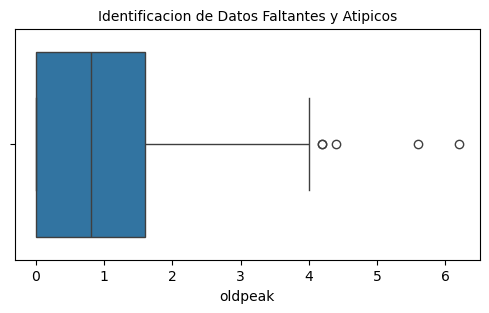

In [27]:
#Identificacion de Datos Faltantes y Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10)

In [11]:
#Revision de Datos faltantes 
print("Cantidad de Registros con cero en trestbps:" ,Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol:" ,Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en thalach:" ,Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak:" ,Datos['oldpeak'].isin([0]).sum())

Cantidad de Registros con cero en trestbps: 0
Cantidad de Registros con cero en chol: 0
Cantidad de Registros con cero en thalach: 0
Cantidad de Registros con cero en oldpeak: 96


In [15]:
#Reemplazar todos los ceros con el valor medio (promedio) de la columna.
Datos['trestbps']=Datos['trestbps'].replace(0,Datos['trestbps'].mean())
Datos['chol']=Datos['chol'].replace(0,Datos['chol'].mean())
Datos['thalach']=Datos['thalach'].replace(0,Datos['thalach'].mean())
Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())

In [16]:
#Revision nuevamente de datos faltantes
print("Cantidad de Registros con cero en trestbps:" ,Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol:" ,Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en thalach:" ,Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak:" ,Datos['oldpeak'].isin([0]).sum())

Cantidad de Registros con cero en trestbps: 0
Cantidad de Registros con cero en chol: 0
Cantidad de Registros con cero en thalach: 0
Cantidad de Registros con cero en oldpeak: 0


Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

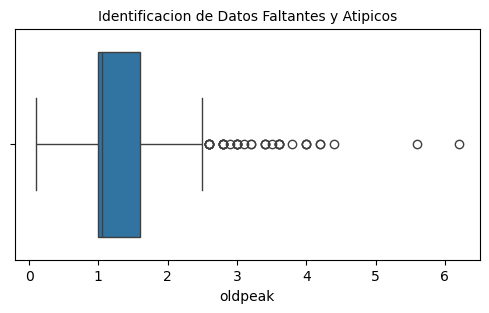

In [14]:
#Identificacion de Datos Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10)

In [3]:
#Conteo de Datos Atipicos 

nivel_minimo=20
nivel_maximo=170
Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atipicos de trestbps es {}".format(Total_Atipicos))

El total de datos atipicos de trestbps es 9


In [4]:
#Conteo de Datos Atipicos 

nivel_minimo=113
nivel_maximo=373
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atipicos de chol es {}".format(Total_Atipicos))

El total de datos atipicos de chol es 5


In [5]:
#Conteo de Datos Atipicos 

nivel_minimo=83
nivel_maximo=215
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El total de datos atipicos de thalach es {}".format(Total_Atipicos))

El total de datos atipicos de thalach es 1


In [6]:
#Conteo de Datos Atipicos 

nivel_minimo=0
nivel_maximo=4
Total_Atipicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print("El total de datos atipicos de oldpeak es {}".format(Total_Atipicos))

El total de datos atipicos de oldpeak es 5


In [7]:
#Filtro Datos Atipicos 
Datos=Datos[(Datos['trestbps']<nivel_maximo)&(Datos['trestbps']>nivel_minimo)]
Datos=Datos[(Datos['chol']<nivel_maximo)&(Datos['chol']>nivel_minimo)]
Datos=Datos[(Datos['oldpeak']<nivel_maximo)&(Datos['oldpeak']>nivel_minimo)]
Datos=Datos[(Datos['thalach']<nivel_maximo)&(Datos['thalach']>nivel_minimo)]

In [8]:
#Validar si se removieron los datos atipicos 
Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atipicos de trestbps es {}".format(Total_Atipicos))

Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atipicos de chol es {}".format(Total_Atipicos))

Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El total de datos atipicos de thalach es {}".format(Total_Atipicos))

Total_Atipicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print("El total de datos atipicos de oldpeak es {}".format(Total_Atipicos))

El total de datos atipicos de trestbps es 0
El total de datos atipicos de chol es 0
El total de datos atipicos de thalach es 0
El total de datos atipicos de oldpeak es 0


In [13]:
#Revision de datos faltantes 
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        0 non-null      int64  
 1   sex        0 non-null      int64  
 2   cp         0 non-null      int64  
 3   trestbps   0 non-null      int64  
 4   chol       0 non-null      int64  
 5   fbs        0 non-null      int64  
 6   restecg    0 non-null      int64  
 7   thalach    0 non-null      int64  
 8   exang      0 non-null      int64  
 9   oldpeak    0 non-null      float64
 10  slope      0 non-null      int64  
 11  ca         0 non-null      int64  
 12  thal       0 non-null      int64  
 13  condition  0 non-null      int64  
dtypes: float64(1), int64(13)
memory usage: 0.0 bytes


In [10]:
#Total personas con enfermedad cardiaca
Datos['condition'].value_counts()

Series([], Name: count, dtype: int64)

In [62]:
Datos [['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [4]:
#Porcentaje de Datos para entrenamiento (train)=90% y para prueba (test)=10%
#Se crean variables X y Y para almacenar la informacion del entrenamiento 
X= Datos.drop('condition',axis=1)
Y= Datos['condition']

#La funcio train_test_split crea una division de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, stratify=Y, random_state= 0)

In [5]:
print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
241   55    1   3       160   289    0        2      145      1      0.8   
176   64    0   3       130   303    0        0      122      0      2.0   
259   51    0   3       130   305    0        0      142      1      1.2   
164   67    1   3       120   237    0        0       71      0      1.0   
100   58    1   2       132   224    0        2      173      0      3.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
50    49    0   1       134   271    0        0      162      0      0.0   
67    41    0   1       126   306    0        0      163      0      0.0   
15    52    1   0       118   186    0        2      190      0      0.0   
135   46    0   2       142   177    0        2      160      1      1.4   
269   48    1   3       130   256    1        2      150      1      0.0   

     slope  ca  thal  
241      1   1     2  
176      1   2     0  
259      1   0    

In [6]:
print(Y_train)

241    1
176    0
259    1
164    1
100    1
      ..
50     0
67     0
15     0
135    0
269    1
Name: condition, Length: 267, dtype: int64


In [7]:
#Construir el modelo de regresion logistica 
modelo_regresion = LogisticRegression(solver = "liblinear") #Liblinear es una libreria para resolver problemas de clasificacion y regresion
modelo_regresion.fit (X_train, Y_train)

#Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) #la funcion predict predice los valores a partir del conjunto de datos de validacion


In [6]:
print (Y_test)

129    1
7      1
162    1
183    1
264    1
263    1
279    1
35     1
280    1
224    1
272    0
177    0
111    0
97     0
255    1
51     0
211    1
117    0
151    0
249    0
163    1
94     0
77     0
47     0
55     0
149    0
33     1
202    1
218    0
39     0
230    1
116    0
271    0
42     0
244    1
96     1
30     0
108    0
131    0
201    1
110    0
270    1
216    1
285    0
198    1
76     1
89     0
63     0
168    1
14     0
235    1
105    0
217    1
185    1
46     0
160    1
148    0
137    0
43     0
276    0
Name: condition, dtype: int64


In [8]:
print (Prediccion)

[0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0]


In [9]:
#Desempeño del modelo de regresion
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



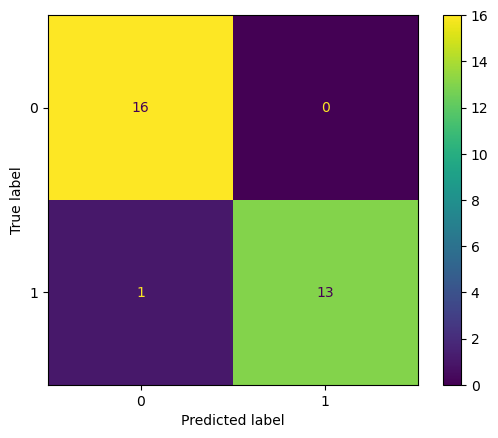

In [10]:
#Matrix de Confusion del modelo
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

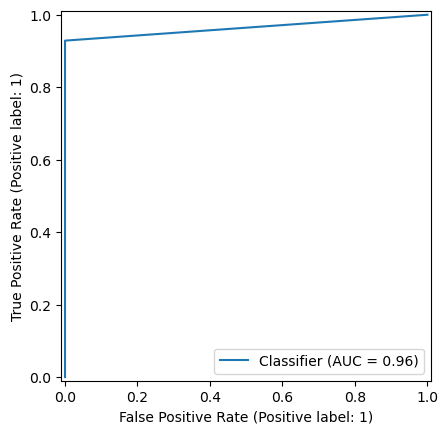

In [11]:
#Curva de precision del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()